<a href="https://colab.research.google.com/github/gh10gh/a/blob/main/A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

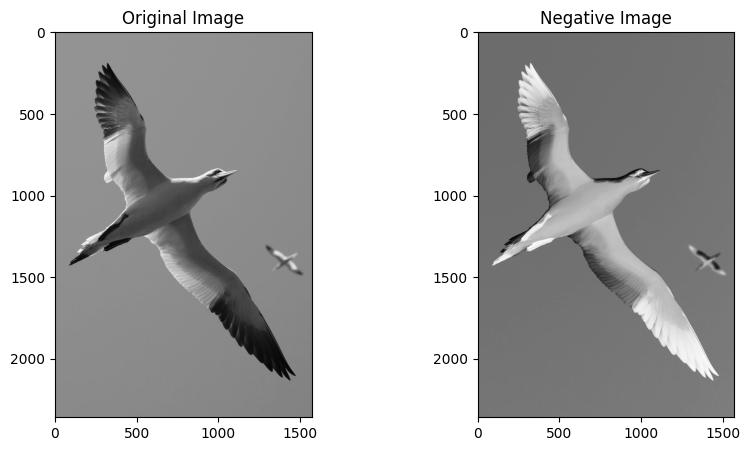

In [5]:
# Objective:
#  To understand and implement various intensity transformation techniques for
#  image enhancement, including Image Negatives (Linear), Log Transformations,
#  Power-Law (Gamma) Transformations, and Piecewise-Linear Transformation
#  Functions.
#  1. Image Negatives (Linear):
#  ● Load a grayscale image into the image processing environment.
#  ● Implement the image negative transformation by subtracting each pixel value from the
#  maximum intensity value.
#  ● Display the original and the transformed image.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'example.jpg' is the already uploaded image
filename = 'example.jpg'

# Load the grayscale image
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Check if image loading was successful
if image is None:
    print(f"Error: Could not load image '{filename}'. "
          "Make sure it's uploaded to your Colab environment.")
else:
    # Image Negative Transformation
    max_intensity = 255  # Maximum intensity for 8-bit image
    negative_image = max_intensity - image

    # Display the original and transformed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('Negative Image')
    plt.imshow(negative_image, cmap='gray')
    plt.show()

<ipython-input-7-91066a20623d>:20: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * (np.log(image + 1))


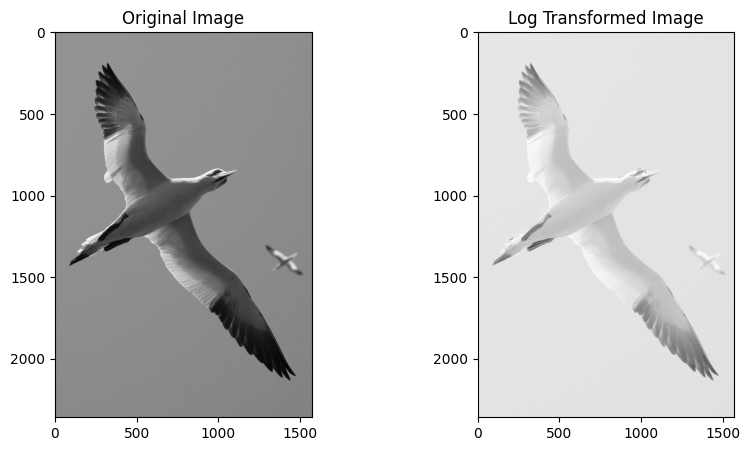

In [7]:
# 2. Log Transformations:
# ● Load a grayscale image into the image processing environment.
# ● Implement the log transformation using the formula:

# where $r$ is the input intensity value, $s$ is the output intensity value, and
# $c$ is a constant for scaling.
# ● Experiment with different values of $c$.
# ● Display the original and transformed images.


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Log Transformation
c = 255 / np.log(1 + np.max(image))  # Constant for scaling
log_transformed_image = c * (np.log(image + 1))

# Ensure the transformed image is within 0-255 range
log_transformed_image = np.clip(log_transformed_image, 0, 255)

# Convert to 8-bit unsigned integer for display
log_transformed_image = np.uint8(log_transformed_image)

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Log Transformed Image')
plt.imshow(log_transformed_image, cmap='gray')
plt.show()

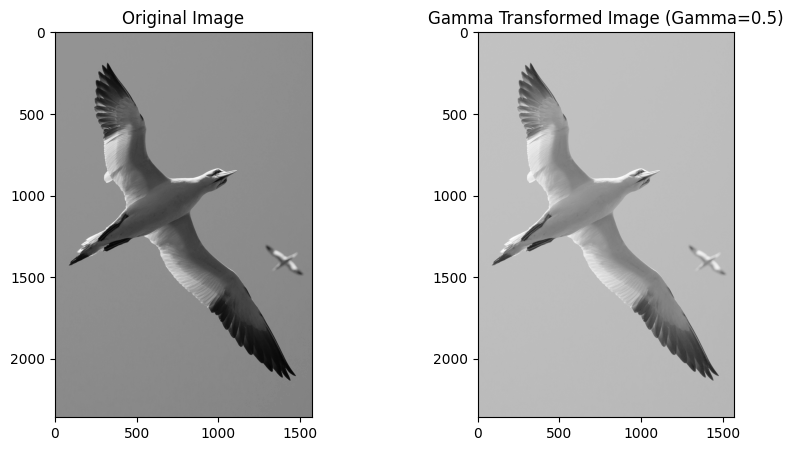

In [8]:
# 3. Power-Law (Gamma) Transformations:
# ● Load a grayscale image into the image processing environment.
# ● Implement the power-law transformation using the formula:

# where $r$ is the input intensity value, $s$ is the output intensity value, $c$
# is a constant for scaling, and $\gamma$ is the gamma parameter.
# ● Experiment with different values of $\gamma$.
# ● Display the original and transformed images.

import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the grayscale image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)
# Power-Law (Gamma) Transformation
c = 1 # Constant for scaling
gamma = 0.5 # Gamma parameter (try different values)
gamma_transformed_image = c * np.power(image / 255.0, gamma)
# Normalize to 0-255 for display
gamma_transformed_image = np.uint8(255 * gamma_transformed_image)
# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title(f'Gamma Transformed Image (Gamma={gamma})')
plt.imshow(gamma_transformed_image, cmap='gray')

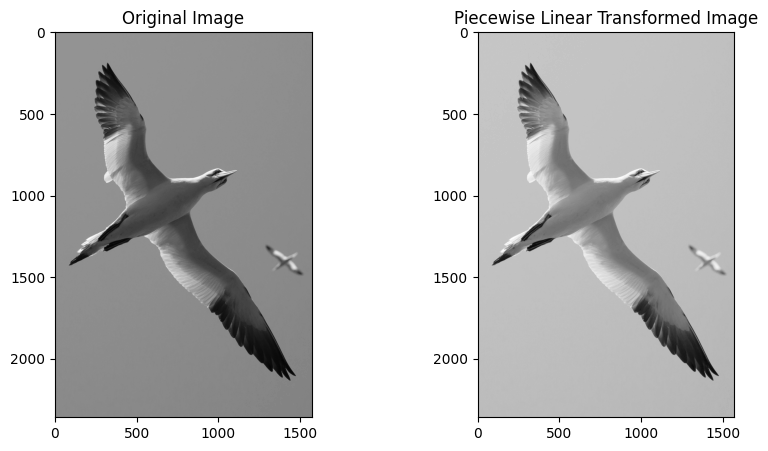

In [11]:
# 4. Piecewise-Linear Transformation Functions:
# ● Load a grayscale image into the image processing environment.
# ● Design a piecewise linear transformation function with multiple segments.
# ● Implement the transformation function to enhance specific regions of
# interest in the image.
# ● Display the original and transformed images.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Piecewise-linear transformation function
def piecewise_linear_transform(image):
    t1, t2 = 50, 150
    s1, s2 = 100, 200

    # Apply transformation for each range
    transformed_image = np.zeros_like(image)
    transformed_image[image < t1] = (image[image < t1] / t1) * s1
    transformed_image[(image >= t1) & (image <= t2)] = ((image[(image >= t1) & (image <= t2)] - t1) / (t2 - t1)) * (s2 - s1) + s1
    transformed_image[image > t2] = ((image[image > t2] - t2) / (255 - t2)) * (255 - s2) + s2

    return np.uint8(transformed_image)

# Apply piecewise-linear transformation
transformed_image = piecewise_linear_transform(image)

# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Piecewise Linear Transformed Image')
plt.imshow(transformed_image, cmap='gray')
plt.show()

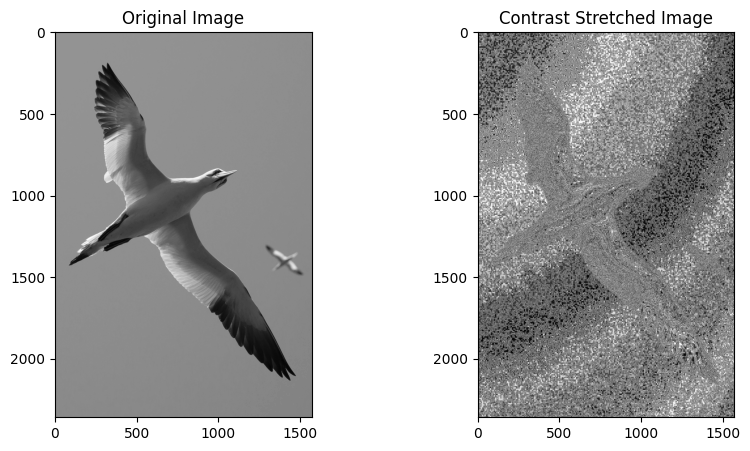

In [13]:
# 5. Contrast Stretching:
# ● Apply contrast stretching to a grayscale image to enhance its contrast.
# ● Experiment with different stretching ranges (minimum and maximum intensity
# values).

import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the grayscale image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)
# Contrast Stretching Transformation
min_intensity = np.min(image)
max_intensity = np.max(image)
# Define the new intensity range for contrast stretching
new_min = 50
new_max = 200
contrast_stretched_image = (image-min_intensity) * (new_max-new_min) / (max_intensity-min_intensity) + new_min
# Display the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Contrast Stretched Image')
plt.imshow(contrast_stretched_image, cmap='gray')
plt.show()

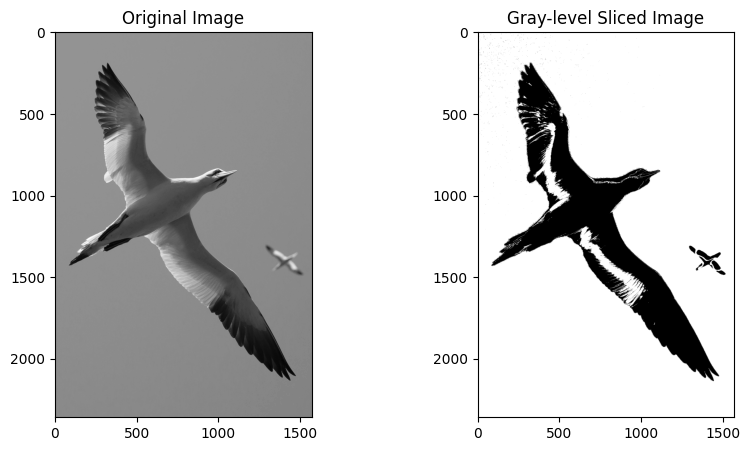

In [15]:
# 6. Gray-level Slicing:
# ● Select a specific range of gray levels from an image using gray-level slicing.
# ● Highlight specific features or regions of interest by setting all other pixel values
# to zero.
# ● Experiment with different threshold values to observe their effects on the sliced
# image.

import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the grayscale image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)
# Gray-level Slicing
lower_threshold = 100
upper_threshold = 150
sliced_image = np.zeros_like(image)
sliced_image[(image >= lower_threshold) & (image <= upper_threshold)] = 255
# Display the original and sliced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Gray-level Sliced Image')
plt.imshow(sliced_image, cmap='gray')
plt.show()


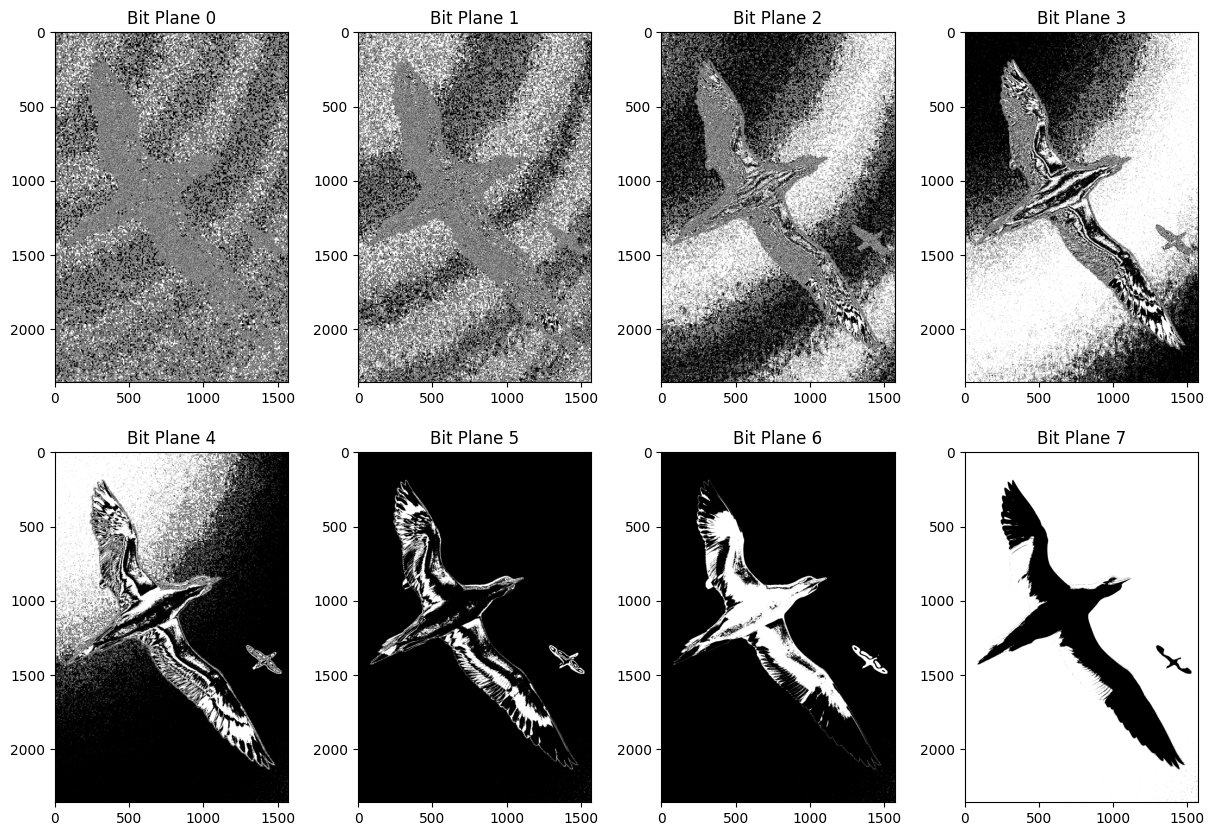

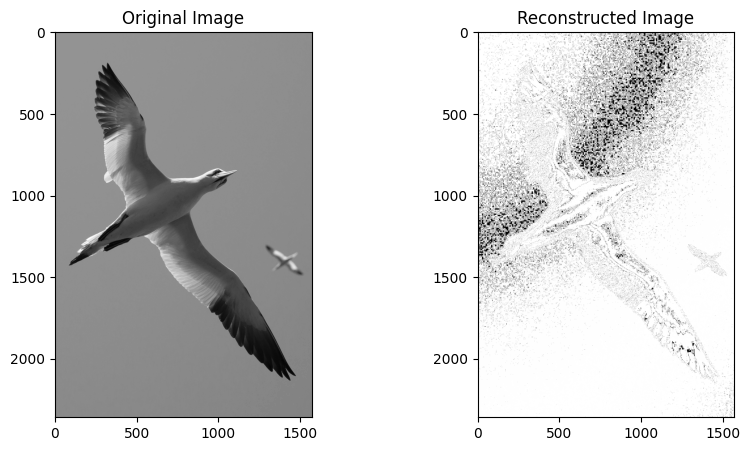

In [19]:
# 7. Bit-plane Slicing:
# ● Perform bit-plane slicing on a grayscale image to decompose it into its binary
# representations.
# ● Visualize individual bit-planes to understand the contribution of each bit to the
# image.
# ● Combine selected bit-planes to reconstruct the original image with reduced
# bit-depth.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# Perform bit-plane slicing
bit_planes = []
for i in range(8):
    bit_plane = (image >> i) & 1
    bit_planes.append(bit_plane * 255)

# Display individual bit-planes
plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.title(f'Bit Plane {i}')
    plt.imshow(bit_planes[i], cmap='gray')
plt.show()

# Combine selected bit-planes to reconstruct image (reduce bit depth)
reconstructed_image = sum([bit_planes[i] for i in range(4)])  # Using lower bit planes (0-3)
reconstructed_image = np.uint8(reconstructed_image)

# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()